In [1]:
#machine learning

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split as tts 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('F:/Data Science/Machine Learning/Projects/Mushroom_Classification(Project)/data/filtered.csv')
df.head()

,Unnamed: 0,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,1,5,2,4,1,6,1,0,1,...,2,2,7,7,2,1,4,2,3,5
1,1,0,5,2,9,1,0,1,0,0,...,2,2,7,7,2,1,4,3,2,1
2,2,0,0,2,8,1,3,1,0,0,...,2,2,7,7,2,1,4,3,2,3
3,3,1,5,3,8,1,6,1,0,1,...,2,2,7,7,2,1,4,2,3,5
4,4,0,5,2,3,0,5,1,1,0,...,2,2,7,7,2,1,0,3,0,1


In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.shape

(8124, 22)

In [6]:
df.columns = df.columns.str.replace('-','_')

In [15]:
df.columns

Index(['class', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_color', 'ring_number', 'ring_type',
       'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [21]:
for i in df.columns:
    print(i ,' : ',df[i].min(), '-', df[i].max())

class  :  0 - 1
cap_shape  :  0 - 5
cap_surface  :  0 - 3
cap_color  :  0 - 9
bruises  :  0 - 1
odor  :  0 - 8
gill_attachment  :  0 - 1
gill_spacing  :  0 - 1
gill_size  :  0 - 1
gill_color  :  0 - 11
stalk_shape  :  0 - 1
stalk_root  :  0 - 4
stalk_surface_above_ring  :  0 - 3
stalk_surface_below_ring  :  0 - 3
stalk_color_above_ring  :  0 - 8
stalk_color_below_ring  :  0 - 8
veil_color  :  0 - 3
ring_number  :  0 - 2
ring_type  :  0 - 4
spore_print_color  :  0 - 8
population  :  0 - 5
habitat  :  0 - 6


<Axes: >

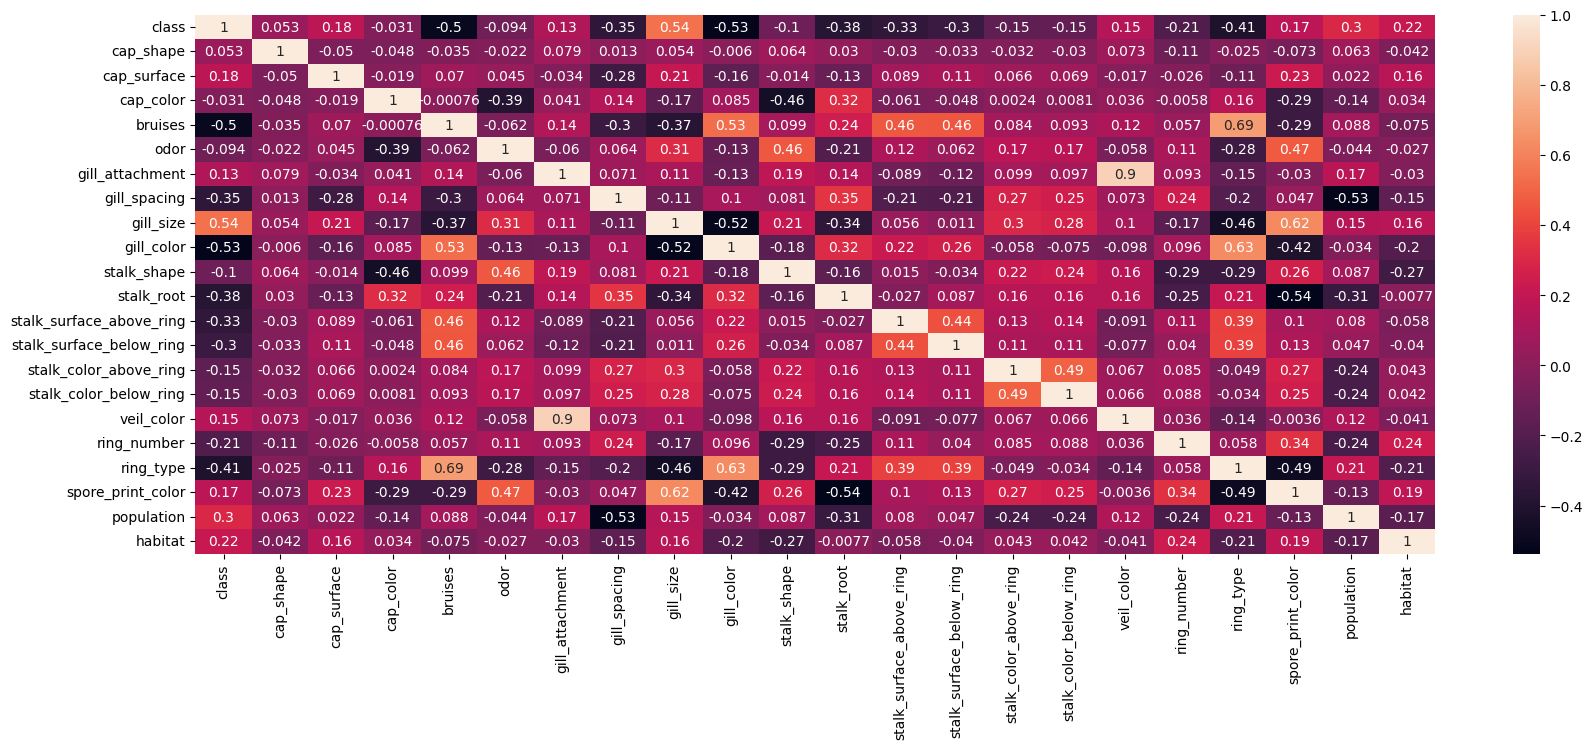

In [7]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)

In [8]:
X = df.drop('class',axis=1)
y = df['class']

In [9]:
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.3,random_state=42)

In [10]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((5686, 21), (5686,), (2438, 21), (2438,))

<Axes: >

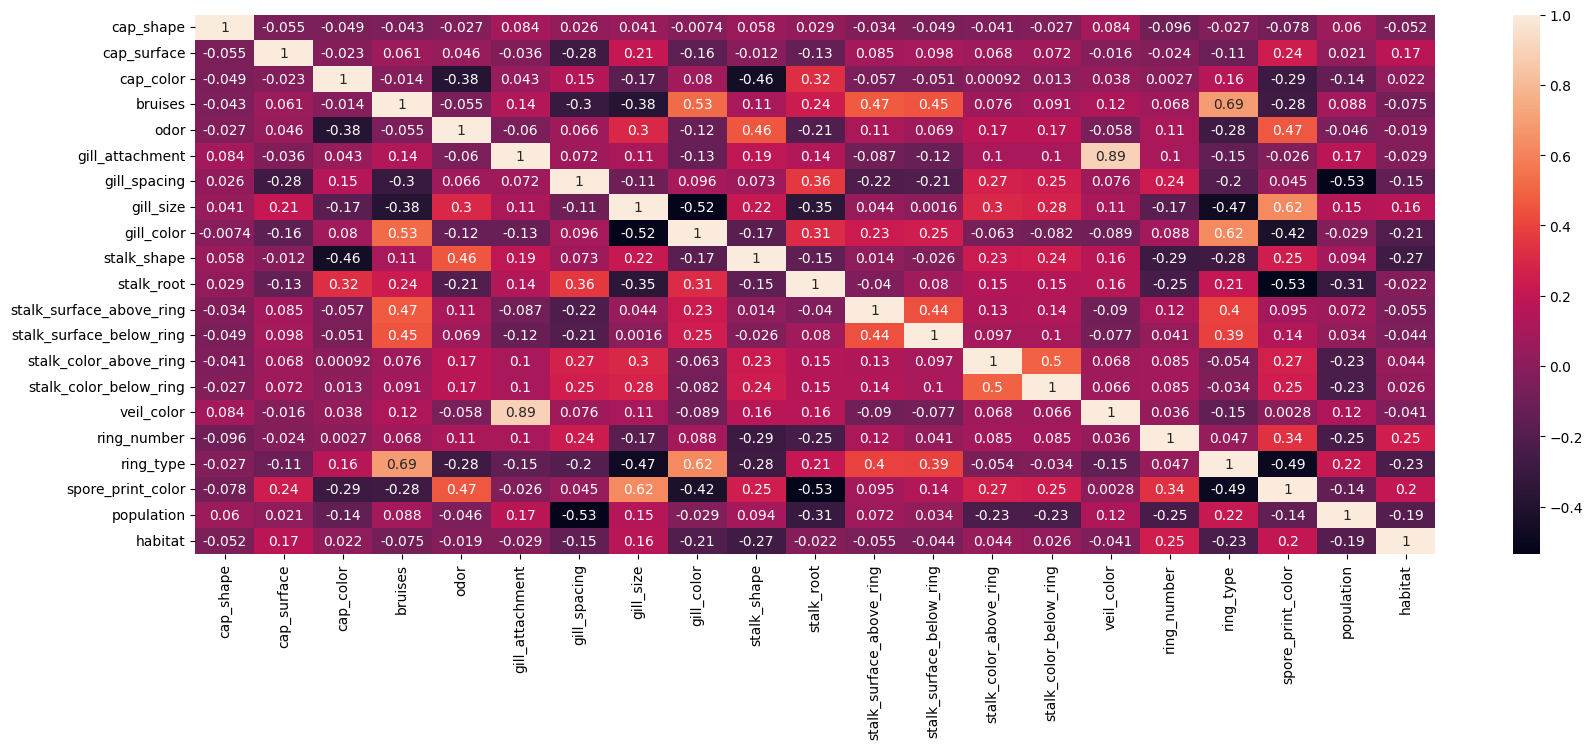

In [11]:
plt.figure(figsize=(20,7))
sns.heatmap(X_train.corr(),annot=True)

In [12]:
 #Feature selection
feature = set()
max_limit = 0.70
for i in range(len(X_train.corr())):
    for j in range(i):
        if(X_train.corr().iloc[i][j] > max_limit):
            feature.add(X_train.columns[i])

In [13]:
feature

{'veil_color'}

In [14]:
X_train.drop(feature,axis=1,inplace=True)
X_test.drop(feature,axis=1,inplace=True)

In [15]:
X_train.columns

Index(['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'ring_number', 'ring_type',
       'spore_print_color', 'population', 'habitat'],
      dtype='object')

In [16]:
#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


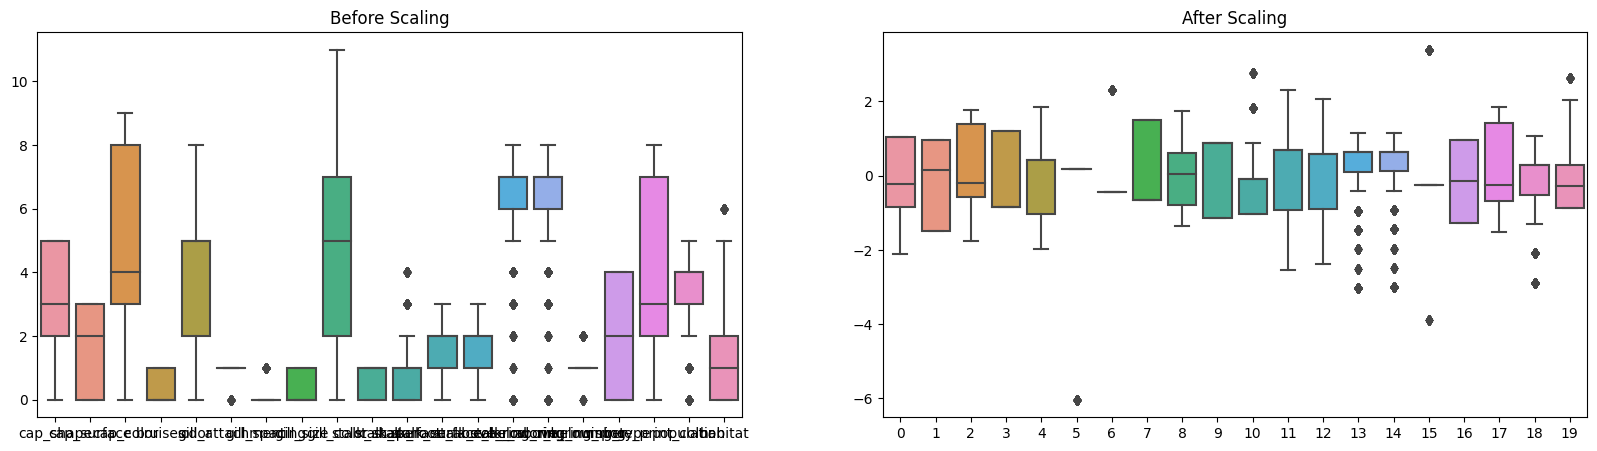

In [17]:
#Visualization
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("Before Scaling")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("After Scaling")
plt.show()

In [18]:
#Linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled,y_train)
y_pred_lr = linear_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred_lr)
mae = mean_absolute_error(y_test,y_pred_lr)
score = r2_score(y_test,y_pred_lr)
print(mae)
print("The accuracy is : ",score*100,"%")

0.1692994292582553
The accuracy is :  73.71254871927073 %


In [19]:
#Lasso
lasso_reg = Lasso()
lasso_reg.fit(X_train_scaled,y_train)
y_pred_ls = lasso_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred_ls)
mae = mean_absolute_error(y_test,y_pred_ls)
score = r2_score(y_test,y_pred_ls)
print(mae)
print("The accuracy is : ",score*100,"%")

0.4994078976413146
The accuracy is :  -0.004648869357914975 %


In [20]:
#Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred_rd = ridge.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred_rd)
mae = mean_absolute_error(y_test,y_pred_rd)
score = r2_score(y_test,y_pred_rd)
print(mae)
print("The accuracy is : ",score*100,"%")

0.16930855655055496
The accuracy is :  73.71320678658219 %


In [21]:
#Elastic Net
#enet
enet = ElasticNet()
enet.fit(X_train_scaled,y_train)
y_pred_enet = enet.predict(X_test_scaled)
mse = mean_squared_error(y_test,y_pred_enet)
mae = mean_absolute_error(y_test,y_pred_enet)
score = r2_score(y_test,y_pred_enet)
print(mae)
print("The accuracy is : ",score*100,"%")

0.4994078976413146
The accuracy is :  -0.004648869357914975 %


In [22]:
#From here we can see that the best fit model is ridge regression in this case with an accuracy of 73%

In [23]:
import pickle as pkl 
pkl.dump(ridge,open('model.pkl','wb'))
pkl.dump(scaler,open('scaler.pkl','wb'))